In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Loading the Customer_Master_Data
df=pd.read_csv("/content/Customer_Master_Data.csv")  # Customer_Master_Data
df.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate
0,CUST10000,Onkar Bhargava,pkeer@yahoo.com,Male,54,Delhi,Divorced,0,2021-02-22
1,CUST10001,Divit Kohli,mkalita@sarin.com,Female,48,Kolkata,Married,0,2023-12-06
2,CUST10002,Kiara Behl,apteanay@hotmail.com,Male,75,Kolkata,Widowed,2,2023-08-23
3,CUST10003,Vaibhav Sankar,bseshadri@choudhry.info,Male,62,Pune,Divorced,2,2022-11-17
4,CUST10004,Shray D’Alia,bdhillon@toor-mall.com,Male,55,Delhi,Divorced,0,2022-12-04


In [6]:
# Loading the Customer_Transactions_Data
df1=pd.read_csv("/content/Customer_Transactions.csv") # Customer_Transactions_Data
df1.head()

,CustomerID,TransactionDate,TransactionAmount
0,CUST10771,7/31/23,2383.07
1,CUST10100,3/10/24,497.54
2,CUST10031,2/17/25,536.78
3,CUST10987,7/17/23,314.89
4,CUST10831,12/15/24,2543.19


In [7]:
#Shape of Customer_Master_Data and data information
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   object
 1   Name           1000 non-null   object
 2   Email          1000 non-null   object
 3   Gender         1000 non-null   object
 4   Age            1000 non-null   int64 
 5   City           1000 non-null   object
 6   MaritalStatus  1000 non-null   object
 7   NumChildren    1000 non-null   int64 
 8   JoinDate       1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


((1000, 9), None)

In [8]:
# Shape of Customer_Transactions_Data and data information
df1.shape, df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         23050 non-null  object 
 1   TransactionDate    23050 non-null  object 
 2   TransactionAmount  23050 non-null  float64
dtypes: float64(1), object(2)
memory usage: 540.4+ KB


((23050, 3), None)

In [9]:
# Merging both Tables
final_df=pd.merge(df,df1, on='CustomerID',how='right')
final_df.head()

,CustomerID,Name,Email,Gender,Age,City,MaritalStatus,NumChildren,JoinDate,TransactionDate,TransactionAmount
0,CUST10771,Lakshay Dhillon,dharmajantara@gmail.com,Female,27,Ahmedabad,Widowed,3,2023-05-31,7/31/23,2383.07
1,CUST10100,Aniruddh Borah,jivikabhavsar@gmail.com,Female,53,Lucknow,Divorced,4,2022-01-08,3/10/24,497.54
2,CUST10031,Ritvik Ahuja,jhaverifarhan@chandra.org,Male,40,Ahmedabad,Single,0,2023-12-03,2/17/25,536.78
3,CUST10987,Jayan Wagle,ojas82@gmail.com,Not Disclosed,75,Bangalore,Widowed,4,2022-03-18,7/17/23,314.89
4,CUST10831,Ishita Agarwal,vbalay@yahoo.com,Not Disclosed,27,Jaipur,Divorced,4,2021-06-30,12/15/24,2543.19


In [10]:
# Shape After megerging both Tables
final_df.shape

(23050, 11)

In [11]:
# Converting data type from object to datetime
final_df['JoinDate']= pd.to_datetime(final_df['JoinDate'])
final_df['TransactionDate']= pd.to_datetime(final_df['TransactionDate'])

/tmp/ipython-input-1023952940.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['TransactionDate']= pd.to_datetime(final_df['TransactionDate'])


In [12]:
# Checking data type
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23050 entries, 0 to 23049
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         23050 non-null  object        
 1   Name               23050 non-null  object        
 2   Email              23050 non-null  object        
 3   Gender             23050 non-null  object        
 4   Age                23050 non-null  int64         
 5   City               23050 non-null  object        
 6   MaritalStatus      23050 non-null  object        
 7   NumChildren        23050 non-null  int64         
 8   JoinDate           23050 non-null  datetime64[ns]
 9   TransactionDate    23050 non-null  datetime64[ns]
 10  TransactionAmount  23050 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [13]:
# Checking Null Values
final_df.isna().sum().sum()

np.int64(0)

In [14]:
# Checking Uniqueness of the CustomerID in Master Data
df['CustomerID'].is_unique

True

In [15]:
# Checking all transaction CustomerID exists in Master data
df1['CustomerID'].isin(df['CustomerID']).all()

np.True_

In [16]:
# Perform RFM Calculations
df_rfm = final_df.groupby('CustomerID').agg(Frequency=('TransactionDate', 'count'),
                                   Monetary=('TransactionAmount','sum'))

In [17]:
df_rfm

,Frequency,Monetary
CustomerID,,
CUST10000,23,21265.49
CUST10001,30,28654.31
CUST10002,24,23884.03
CUST10003,25,24206.03
CUST10004,19,25565.30
...,...,...
CUST10995,21,24325.19
CUST10996,21,21809.11
CUST10997,20,21120.48


In [18]:
# Reference Date
reference_date=final_df['TransactionDate'].max()+pd.Timedelta(days=1)
reference_date

Timestamp('2025-07-30 00:00:00')

In [19]:
# Latest Date
last_transaction = final_df.groupby('CustomerID')['TransactionDate'].max()
last_transaction

,TransactionDate
CustomerID,
CUST10000,2025-07-17
CUST10001,2025-06-25
CUST10002,2025-07-12
CUST10003,2025-05-10
CUST10004,2025-07-22
...,...
CUST10995,2024-06-23
CUST10996,2025-07-15
CUST10997,2025-06-28


In [20]:
df_rfm['Recency'] = (reference_date-last_transaction).dt.days

In [21]:
#
df_rfm['R_Score'] = pd.qcut(df_rfm['Recency'], q=5,labels=[5,4,3,2,1])
df_rfm['F_Score'] = pd.qcut(df_rfm['Frequency'], q=5, labels=[1,2,3,4,5])
df_rfm['M_Score'] = pd.qcut(df_rfm['Monetary'], q=5, labels=[1,2,3,4,5])

In [22]:
df_rfm['Segment'] = df_rfm['R_Score'].astype(str)+df_rfm['F_Score'].astype(str)+df_rfm['M_Score'].astype(str)

In [23]:
df_rfm.head()

,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,Segment
CustomerID,,,,,,,
CUST10000,23,21265.49,13,4,3,2,432
CUST10001,30,28654.31,35,3,5,5,355
CUST10002,24,23884.03,18,4,3,3,433
CUST10003,25,24206.03,81,1,4,3,143
CUST10004,19,25565.30,8,5,1,4,514


In [24]:
def rfm_segment(assign):
    if assign['R_Score']>=4 and assign['F_Score']>=4 and assign['M_Score']>=4:
        return 'Champions'
    elif assign['F_Score']>=4 and assign['R_Score']>=3:
        return 'Loyal Customers'
    elif assign['F_Score']>=4 and assign['R_Score']<3:
        return 'Potential Loyalists'
    elif assign['R_Score']>=2 and assign['F_Score']>=3:
        return 'At Risk'
    elif assign['R_Score']>=2 and assign['F_Score']<2:
        return 'Hibernating'
    else:
        return 'Others'

In [25]:
df_rfm['Segment_Labels'] = df_rfm.apply(rfm_segment, axis=1)

In [26]:
df_rfm

,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,Segment,Segment_Labels
CustomerID,,,,,,,,
CUST10000,23,21265.49,13,4,3,2,432,At Risk
CUST10001,30,28654.31,35,3,5,5,355,Loyal Customers
CUST10002,24,23884.03,18,4,3,3,433,At Risk
CUST10003,25,24206.03,81,1,4,3,143,Potential Loyalists
CUST10004,19,25565.30,8,5,1,4,514,Hibernating
...,...,...,...,...,...,...,...,...
CUST10995,21,24325.19,402,1,2,3,123,Others
CUST10996,21,21809.11,15,4,2,3,423,Others
CUST10997,20,21120.48,32,3,2,2,322,Others


In [27]:
# Visualize

Count of customers in each segment

In [35]:
segment_name = df_rfm['Segment_Labels'].value_counts().index
segment_name

Index(['Others', 'Hibernating', 'Potential Loyalists', 'At Risk', 'Champions',
       'Loyal Customers'],
      dtype='object', name='Segment_Labels')

In [44]:
segment_counts = df_rfm['Segment_Labels'].value_counts().values
segment_counts

array([305, 186, 134, 134, 127, 114])

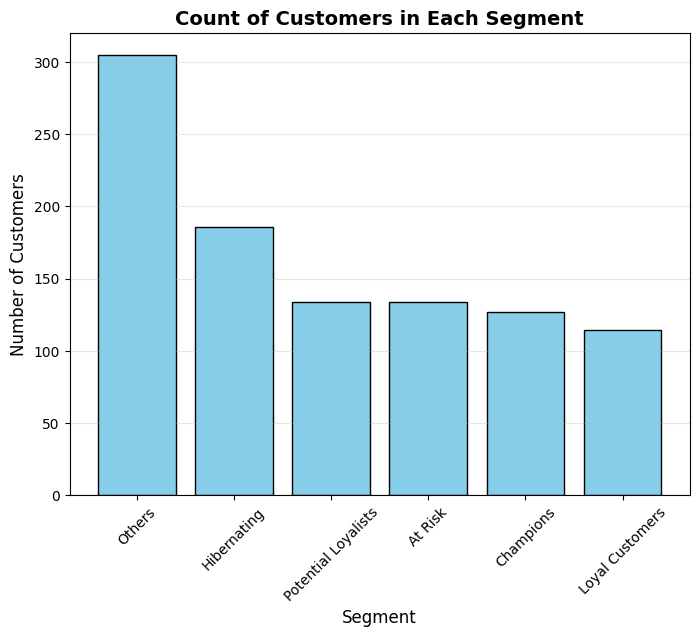

In [91]:
plt.figure(figsize=(8,6))
plt.bar(segment_name,segment_counts, color='skyblue', edgecolor='black')
plt.title('Count of Customers in Each Segment', fontsize=14, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)


Revenue contribution per segment

In [66]:
Segment_Labels_name = df_rfm.groupby('Segment_Labels')['Monetary'].sum().sort_values(ascending=False).index
Segment_Labels_name

Index(['Others', 'Champions', 'Potential Loyalists', 'At Risk', 'Hibernating',
       'Loyal Customers'],
      dtype='object', name='Segment_Labels')

In [67]:
Segment_Labels_values = df_rfm.groupby('Segment_Labels')['Monetary'].sum().sort_values(ascending=False).values
Segment_Labels_values

array([6341334.12, 3725144.54, 3651294.43, 3185000.29, 3127402.54,
       3023023.74])

([<matplotlib.patches.Wedge at 0x7e5c1284e540>,
 [Text(0.7791256359536175, 0.912668200059513, 'Others'),
  Text(-0.6789304497004436, 0.8654787371562364, 'Champions'),
  Text(-1.0945456905485633, -0.10940626719511476, 'Potential Loyalists'),
  Text(-0.5651247937969778, -0.9437340554605007, 'At Risk'),
  Text(0.3467308359174768, -1.0439241962058203, 'Hibernating'),
  Text(1.0079696979381385, -0.4404510052644877, 'Loyal Customers')],
 [Text(0.4544899543062768, 0.5323897833680492, '27.5%'),
  Text(-0.3703256998366055, 0.4720793111761289, '16.2%'),
  Text(-0.5970249221173981, -0.059676145742789864, '15.8%'),
  Text(-0.3082498875256242, -0.5147640302511821, '13.8%'),
  Text(0.18912591050044186, -0.5694131979304474, '13.6%'),
  Text(0.5498016534208028, -0.24024600287153872, '13.1%')])

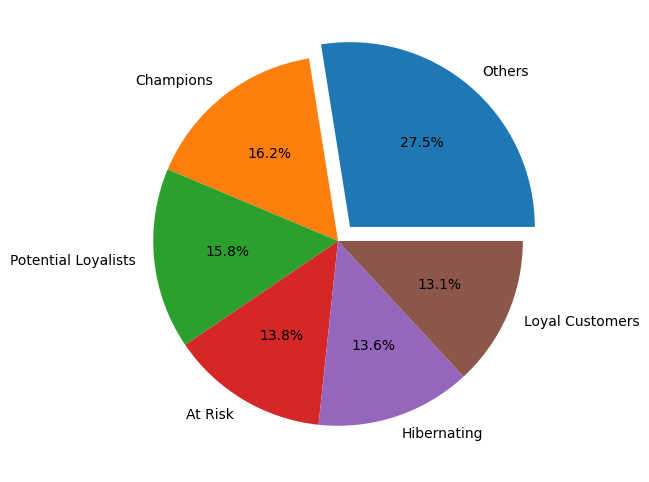

In [89]:
plt.figure(figsize=(8,6))
explode=[0.1,0,0,0,0,0]
plt.pie(Segment_Labels_values, labels=Segment_Labels_name, autopct="%1.1f%%", explode=explode)

Recency Vs Monetary Scatter Plot

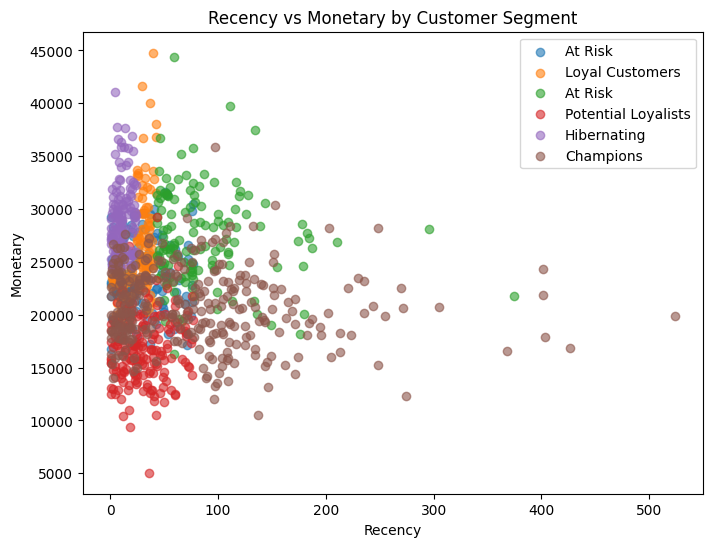

In [88]:
plt.figure(figsize=(8,6))

for segment in df_rfm['Segment_Labels'].unique():
    subset = df_rfm[df_rfm['Segment_Labels'] == segment]
    plt.scatter(
        subset['Recency'],
        subset['Monetary'],
        label=segment,
        alpha=0.6
    )

plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary by Customer Segment')
plt.legend(df_rfm['Segment_Labels'])
